In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from models import ModelManager, ModelType
from utils import MnistData

In [ ]:
data = MnistData()

## Training

In [177]:
generator = ModelManager.get_untrained(ModelType.Generator)
discriminator = ModelManager.get_untrained(ModelType.Discriminator)

In [178]:

generator_optimizer = optim.SGD(generator.parameters(), lr=1e-4, momentum=True)
discriminator_optimizer = optim.SGD(discriminator.parameters(), lr=1e-5, momentum=True)

batch = 30

# pre-train the discriminator
for epoch in range(150):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.rand(batch, 100)
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = - ((1 - batch_of_generated_discrimination).log().sum() / batch) - (batch_of_real_discrimination.log().sum() / batch)
    discriminator_loss.backward()
    discriminator_optimizer.step()
    if epoch % 10 == 0:
        print(f'D--{epoch}:{discriminator_loss.item()}--D')

discriminator_optimizer = optim.SGD(discriminator.parameters(), lr=1e-6)

for epoch in range(1000):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.rand(batch, 100)
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = - ((1 - batch_of_generated_discrimination).log().sum() / batch) - (batch_of_real_discrimination.log().sum() / batch)
    discriminator_loss.backward(retain_graph=False)
    discriminator_optimizer.step()

    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)

    generator_loss = (1 - batch_of_generated_discrimination).log().sum() / batch
    discriminator_optimizer.zero_grad()
    generator_optimizer.zero_grad()
    generator_loss.backward(create_graph=True)
    generator_optimizer.step()

    # log
    if epoch % 10 == 0:
        print(f'---{epoch}:D:{discriminator_loss.item()}:G:{generator_loss.item()}---')
        # MnistData.display(batch_of_generated[0], scale=True)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (30x10 and 100x10024)

## Check

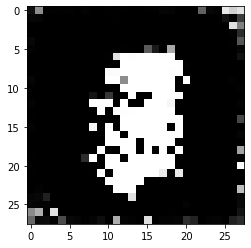

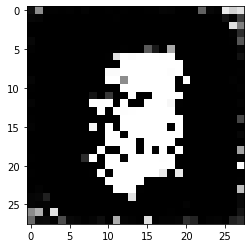

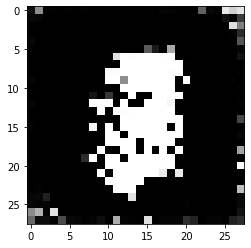

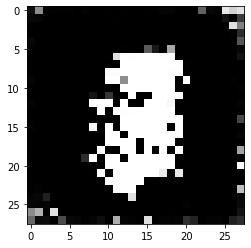

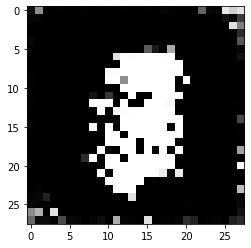

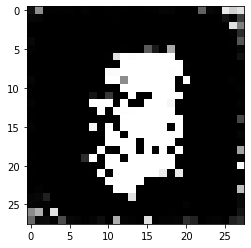

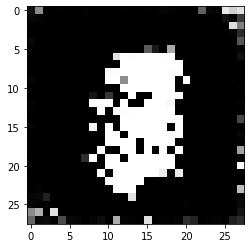

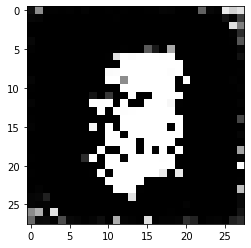

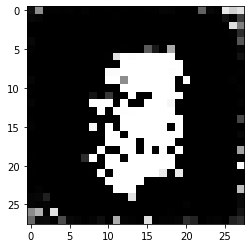

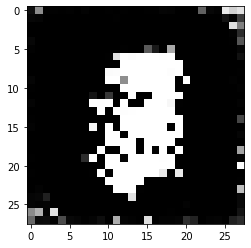

In [176]:
examples = generator(torch.rand(10, 100))

for i in range(10):
    MnistData.display(examples[i], scale=True)